In [1]:
!pip install pandas networkx matplotlib scikit-learn

# استيراد المكتبات
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
import os
path = "/content/drive/MyDrive/projectalgo/archive (2) 2"
os.chdir(path)

import pandas as pd
files = os.listdir()

files

['musae_git_target.csv',
 'musae_git_edges.csv',
 'musae_git_features.csv',
 '.ipynb_checkpoints']

In [4]:
!pip install pandas numpy networkx scikit-learn
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.6 MB/s eta 0:00:00


In [5]:
edges_path = '/content/drive/MyDrive/projectalgo/archive (2) 2/musae_git_edges.csv'
features_path = '/content/drive/MyDrive/projectalgo/archive (2) 2/musae_git_features.csv'
target_path = '/content/drive/MyDrive/projectalgo/archive (2) 2/musae_git_target.csv'

# قراءة البيانات باستخدام Pandas
import pandas as pd

edges = pd.read_csv(edges_path)
features = pd.read_csv(features_path)
target = pd.read_csv(target_path)

# عرض أول 5 صفوف من كل ملف للتأكد من قراءة البيانات
print("Edges:")
print(edges.head())
print("\nFeatures:")
print(features.head())
print("\nTarget:")
print(target.head())

Edges:
   id_1   id_2
0     0  23977
1     1  34526
2     1   2370
3     1  14683
4     1  29982

Features:
   node  feature
0     0     1574
1     0     3773
2     0     3571
3     0     2672
4     0     2478

Target:
   id          name  ml_target
0   0        Eiryyy          0
1   1    shawflying          0
2   2   JpMCarrilho          1
3   3     SuhwanCha          0
4   4  sunilangadi2          1


In [6]:

edges.rename(columns={'id_1': 'source', 'id_2': 'target'} , inplace=True)
edges.head()

,source,target
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


In [7]:
G = nx.from_pandas_edgelist(edges, source='source', target='target')

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

print(f"Graph type: {type(G)}")


Number of nodes: 37700
Number of edges: 289003
Graph type: <class 'networkx.classes.graph.Graph'>


In [8]:
import matplotlib.pyplot as plt
print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
print(f"Density: {nx.density(G):.6f}")
print(f"Number of connected components: {nx.number_connected_components(G)}")


Average degree: 15.33
Density: 0.000407
Number of connected components: 1


In [9]:
largest_component = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_component)
print(f"Largest connected component has {subgraph.number_of_nodes()} nodes and {subgraph.number_of_edges()} edges.")


Largest connected component has 37700 nodes and 289003 edges.


In [10]:
coloring = nx.coloring.greedy_color(G, strategy="largest_first")
print(f"Number of colors used: {len(set(coloring.values()))}")

coloring_df = pd.DataFrame(coloring.items(), columns=["Node", "Color"])
print(coloring_df.head())


Number of colors used: 25
    Node  Color
0  31890      0
1  27803      1
2  35773      2
3  19222      3
4  13638      4


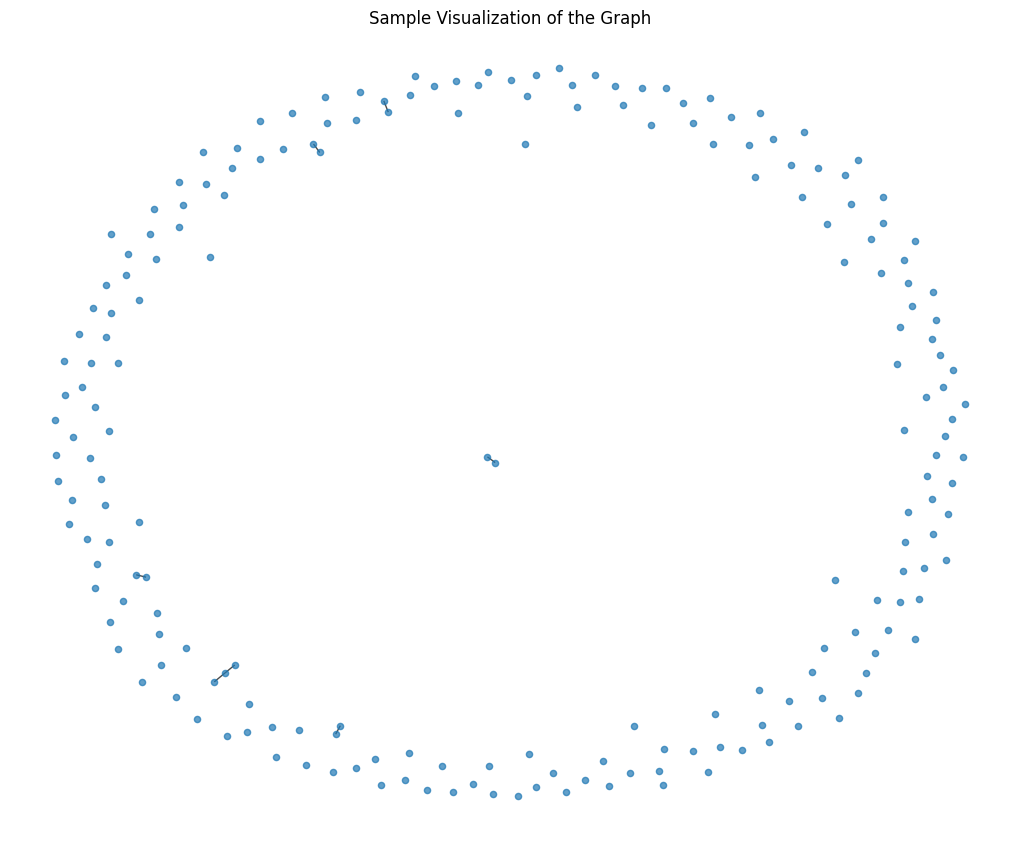

In [78]:
sample_nodes = list(coloring_df.sample(200)["Node"])
subgraph_sample = G.subgraph(sample_nodes)

plt.figure(figsize=(10, 8))
nx.draw(subgraph_sample, node_size=20, alpha=0.7)
plt.title("Sample Visualization of the Graph")
plt.show()


Graph Coloring for Selected Nodes: {740: 0, 14700: 1, 24067: 0, 17419: 0, 27661: 0, 12302: 0, 30742: 0, 30236: 0, 35361: 0, 36900: 0, 25125: 0, 13362: 0, 2105: 0, 35903: 0, 26690: 0, 30289: 0, 35923: 0, 32852: 0, 18006: 0, 16985: 0, 25179: 0, 23653: 0, 32874: 0, 11373: 0, 24688: 0, 21109: 0, 31355: 0, 1672: 0, 18062: 0, 18065: 0, 3218: 0, 29862: 0, 36529: 0, 30902: 0, 6840: 0, 19128: 0, 1724: 0, 37567: 0, 26305: 0, 36547: 0, 25291: 0, 23763: 0, 28372: 0, 4309: 0, 29407: 0, 29921: 0, 7907: 0, 12518: 0, 29952: 0, 32017: 0, 19217: 0, 9507: 0, 3369: 0, 6954: 0, 1843: 0, 27443: 0, 14132: 0, 7477: 0, 14140: 0, 17213: 0, 34108: 0, 23365: 0, 24904: 0, 37209: 0, 23899: 0, 29533: 0, 31585: 0, 11625: 0, 1901: 0, 18803: 0, 22900: 0, 8052: 0, 2423: 0, 28025: 0, 12156: 0, 26494: 0, 5507: 0, 22414: 0, 29591: 0, 32670: 0, 16286: 0, 5537: 0, 27569: 0, 22966: 0, 34743: 0, 20920: 0, 21949: 0, 18374: 0, 33736: 0, 9672: 0, 25548: 0, 32204: 0, 22990: 0, 29145: 0, 32218: 0, 24542: 0, 7139: 0, 14310: 0, 2537:

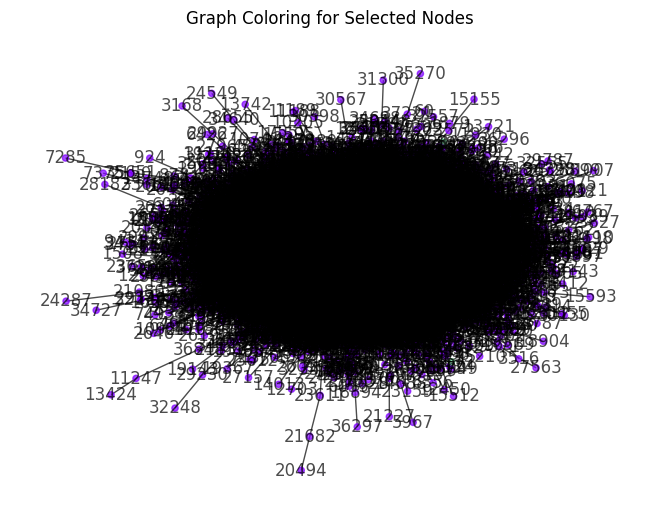

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import torch

# افترض أنك قد حصلت على بيانات العقد والروابط والميزات
# مثال على بيانات الروابط (edges) و العقد (nodes) والميزات (features)
# edges_df يجب أن يحتوي على الأعمدة ["source", "target"]
# features_df يجب أن يحتوي على الأعمدة ["Node", "feature1", "feature2"]
# coloring_df يحتوي على الأعمدة ["Node", "color_group"] (اختياري للتلوين بناءً على مجموعات معينة)

# تحويل بيانات الروابط إلى رسم بياني
edges_list = edges[["source", "target"]].values
G = nx.Graph()
G.add_edges_from(edges_list)

# إضافة ميزات العقد (مثل درجات العقد أو أي ميزات أخرى) إلى العقد في الرسم البياني
for index, row in features.iterrows():
    G.nodes[row["Node"]]["feature"] = row[["Node", "feature"]].values

# في حال أردت التلوين بناءً على مجموعة معينة من العقد أو من coloring_df
# اختر مجموعة معينة (مثل اختيار عقدة محددة بناءً على التصنيف أو مجموعة عشوائية)
sample_nodes = list(coloring_df.sample(100)["Node"])

# استخراج الجزء الفرعي من الرسم البياني
subgraph_sample = G.subgraph(sample_nodes)

# تطبيق خوارزمية التلوين الجشع على العقد في الجزء الفرعي
coloring = nx.coloring.greedy_color(subgraph_sample, strategy='largest_first')

# طباعة التلوين
print("Graph Coloring for Selected Nodes:", coloring)

# رسم الرسم البياني مع التلوين
node_colors = [coloring[node] if node in coloring else -1 for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=20, alpha=0.7)
plt.title("Graph Coloring for Selected Nodes")
plt.show()


Graph Coloring for Subgraph Nodes: {7562: 0, 3098: 0, 36747: 1, 4304: 0, 32507: 1, 9470: 1, 11528: 1, 24343: 1, 15770: 1, 17875: 0, 35328: 0, 28168: 0, 23564: 0, 26129: 0, 18455: 0, 27679: 0, 1569: 0, 14370: 0, 26148: 0, 13862: 0, 13361: 0, 34866: 0, 13879: 0, 31801: 0, 27194: 0, 32825: 0, 16441: 0, 3645: 0, 3139: 0, 19525: 0, 34375: 0, 7240: 0, 19016: 0, 9290: 0, 27724: 0, 14924: 0, 12367: 0, 18000: 0, 19024: 0, 12883: 0, 12372: 0, 29783: 0, 9820: 0, 14942: 0, 23135: 0, 27231: 0, 26718: 0, 16485: 0, 23142: 0, 35431: 0, 27752: 0, 27241: 0, 17514: 0, 36971: 0, 16492: 0, 30317: 0, 24687: 0, 7792: 0, 31346: 0, 25718: 0, 15483: 0, 126: 0, 5246: 0, 14465: 0, 2179: 0, 18569: 0, 17037: 0, 12943: 0, 16527: 0, 28309: 0, 11421: 0, 21150: 0, 18593: 0, 30883: 0, 14500: 0, 33449: 0, 23723: 0, 22189: 0, 29870: 0, 36014: 0, 31413: 0, 13494: 0, 21690: 0, 32959: 0, 30924: 0, 13525: 0, 24790: 0, 8405: 0, 6363: 0, 18651: 0, 6876: 0, 32475: 0, 10975: 0, 16097: 0, 6882: 0, 26854: 0, 12520: 0, 27371: 0, 330

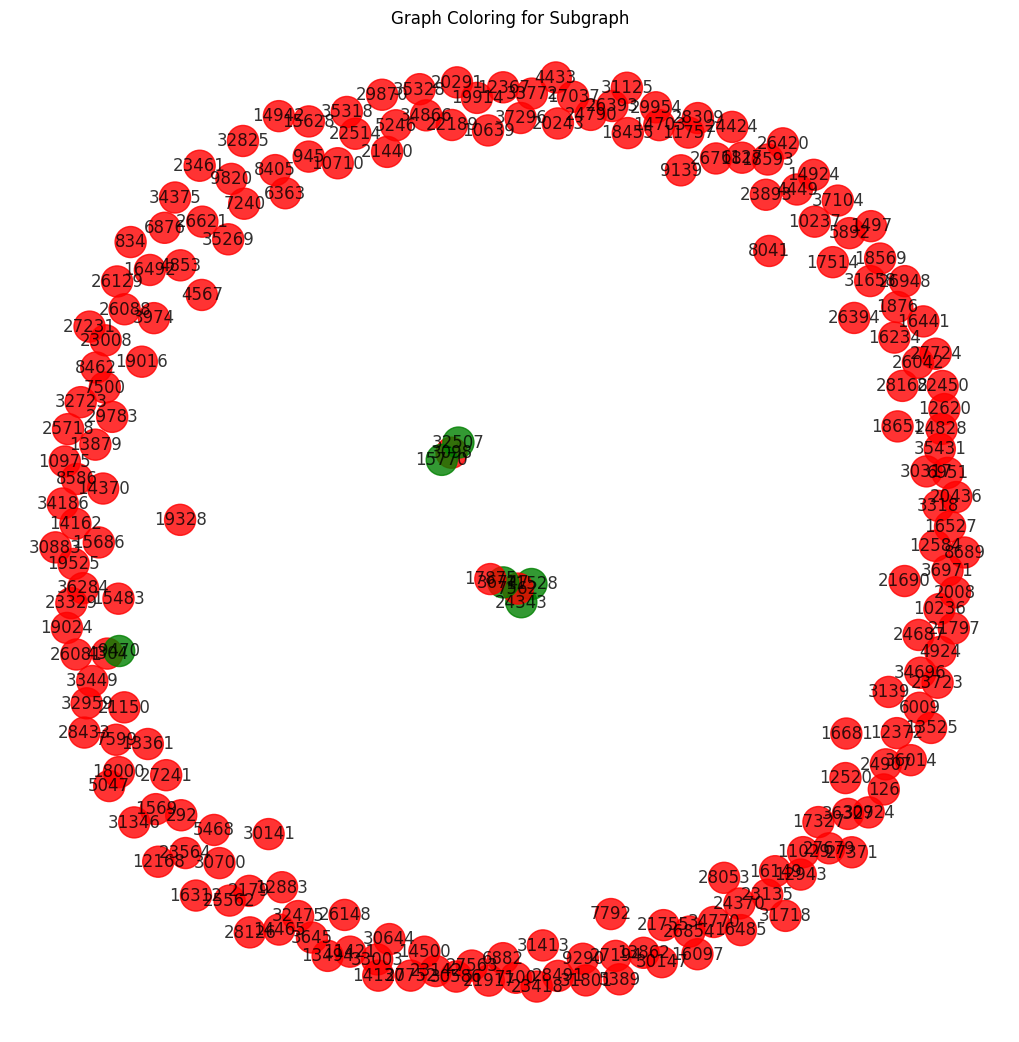

In [17]:

# افترض أنك قمت بإنشاء الرسم البياني الأساسي G
# edges_list يحتوي على الروابط
edges_list = edges[["source", "target"]].values
G = nx.Graph()
G.add_edges_from(edges_list)
features = features.rename(columns={'node': 'Node'})
# إضافة ميزات العقد (مثل درجات العقد أو أي ميزات أخرى) إلى العقد في الرسم البياني
for index, row in features.iterrows():
    G.nodes[row["Node"]]["feature"] = row[["Node", "feature"]].values

# في حال أردت التلوين بناءً على مجموعة معينة من العقد أو من coloring_df
# اختر مجموعة معينة (مثل اختيار عقدة محددة بناءً على التصنيف أو مجموعة عشوائية)

# اختيار مجموعة فرعية من العقد
sample_nodes = list(coloring_df.sample(200)["Node"])  # عينة عشوائية من 50 عقدة
subgraph_sample = G.subgraph(sample_nodes)  # إنشاء الرسم البياني الفرعي

# تطبيق خوارزمية التلوين الجشع على العقد في الجزء الفرعي
subgraph_coloring = nx.coloring.greedy_color(subgraph_sample, strategy='largest_first')

# طباعة التلوين للعقد في الرسم البياني الفرعي
print("Graph Coloring for Subgraph Nodes:", subgraph_coloring)

# تخصيص الألوان بناءً على نتيجة التلوين
color_map = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}  # تخصيص ألوان لكل مجموعة
node_colors = [color_map[subgraph_coloring[node]] if node in subgraph_coloring else 'grey' for node in G.nodes()]

# رسم الرسم البياني الفرعي
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph_sample, seed=42)  # توزيع العقد في الرسم الفرعي
nx.draw(subgraph_sample, pos, with_labels=True, node_color=[color_map[subgraph_coloring[node]] for node in subgraph_sample.nodes()], node_size=500, alpha=0.8)

# إضافة عنوان
plt.title("Graph Coloring for Subgraph")
plt.show()


In [30]:
target = target.rename(columns={ 'ml_target': 'label'})


target = target[['id',  'label']]
target.head()


,id,label
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1


In [31]:
# 6. إعداد بيانات التنبؤ
# عينات إيجابية (روابط موجودة)
positive_samples = edges.copy()
positive_samples["Label"] = 1

# إنشاء عينات سلبية (روابط غير موجودة)
negative_samples = []
nodes = list(G.nodes())
while len(negative_samples) < len(positive_samples):
    u, v = random.sample(nodes, 2)
    if not G.has_edge(u, v):
        negative_samples.append({"source": u, "target": v, "Label": 0})

negative_samples = pd.DataFrame(negative_samples)

# دمج العينات
all_samples = pd.concat([positive_samples, negative_samples])

# تقسيم البيانات
X = all_samples[["source", "target"]]
y = all_samples["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تحويل العقد إلى ميزات رقمية (Mapping)
node_mapping = {node: idx for idx, node in enumerate(G.nodes())}
X_train = X_train.replace(node_mapping)
X_test = X_test.replace(node_mapping)

# 7. تدريب نموذج Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# التقييم
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8073493962007359
ROC AUC: 0.8073334619539297


In [32]:
features = features.rename(columns={'node': 'Node'})
features.head()

,Node,feature
0,0,1574
1,0,3773
2,0,3571
3,0,2672
4,0,2478


In [35]:
# حساب درجة العقدة
node_degrees = dict(G.degree())

# حساب Clustering Coefficient
node_clustering = nx.clustering(G)

# دمج التلوين
node_colors = coloring

# إنشاء DataFrame يحتوي على ميزات العقد
node_features = pd.DataFrame({
    "Node": list(G.nodes()),
    "Degree": [node_degrees[node] for node in G.nodes()],
    "Clustering": [node_clustering[node] for node in G.nodes()],
    "Color": [node_colors[node] for node in G.nodes()],
})
print(node_features.head())


    Node  Degree  Clustering  Color
0      0       1    0.000000      0
1  23977      32    0.098790      4
2      1       8    0.178571      0
3  34526       2    0.000000      1
4   2370      40    0.176923      8


In [36]:
# دمج ميزات العقد مع بيانات الروابط
def add_node_features(df, node_features):
    # انضمام ميزات العقدة الأولى
    df = df.merge(node_features, left_on="source", right_on="Node", how="left").rename(
        columns={"Degree": "Degree_1", "Clustering": "Clustering_1", "Color": "Color_1"}
    )
    df = df.drop(columns=["Node"])

    # انضمام ميزات العقدة الثانية
    df = df.merge(node_features, left_on="target", right_on="Node", how="left").rename(
        columns={"Degree": "Degree_2", "Clustering": "Clustering_2", "Color": "Color_2"}
    )
    df = df.drop(columns=["Node"])
    return df

# إضافة الميزات إلى بيانات التدريب والاختبار
X_train = add_node_features(X_train, node_features)
X_test = add_node_features(X_test, node_features)

# عرض البيانات بعد إضافة الميزات
print(X_train.head())


   source  target  Degree_1  Clustering_1  Color_1  Degree_2  Clustering_2  \
0    8580   25143        55      0.125253        7        17      0.213235   
1   13214   18292         4      0.333333        0         6      0.133333   
2    5335   29678        46      0.102415        4         1      0.000000   
3   19039   16353         4      0.500000        1         9      0.250000   
4   13854    5026         5      0.100000        1         5      0.100000   

   Color_2  
0        0  
1        1  
2        1  
3        3  
4        2  


In [37]:
# تدريب نموذج Random Forest باستخدام الميزات الجديدة
model = RandomForestClassifier()
model.fit(X_train.drop(columns=["source", "target"]), y_train)

# التقييم
y_pred = model.predict(X_test.drop(columns=["source", "target"]))
print("Accuracy with Features:", accuracy_score(y_test, y_pred))
print("ROC AUC with Features:", roc_auc_score(y_test, y_pred))


Accuracy with Features: 0.6235337539359408
ROC AUC with Features: 0.6235139477166163


In [33]:
!pip install torch torchvision torchaudio
!pip install torch-geometric


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv


In [38]:
# إنشاء الأهداف (على سبيل المثال، إذا كنت تعمل على التنبؤ بالروابط)
# ينبغي أن يكون لديك هدف واحد لكل رابط في edge_index
# افترض أن لديك بيانات إضافية لتمثيل الأهداف الثنائية (التي تصف ما إذا كان الرابط موجودًا أم لا)

# هنا، سوف نضع مثالًا عشوائيًا للأهداف للروابط
edge_labels = torch.randint(0, 2, (edges_index.shape[1],), dtype=torch.float)  # 0 أو 1 لكل رابط

# تحديث بيانات GNN لتتضمن الأهداف بشكل صحيح
data.y = edge_labels  # ربط الأهداف في data.y بالروابط في edge_index

print(f"Updated data object: {data}")


Updated data object: Data(x=[690374, 2], edge_index=[2, 289003], y=[289003])


In [39]:
print(f"Number of edges: {data.edge_index.shape[1]}")
print(f"Number of labels: {data.y.shape[0]}")


Number of edges: 289003
Number of labels: 289003


In [40]:
# تحديث الأهداف (labels) لتناسب عدد الروابط
data.y = torch.randint(0, 2, (data.edge_index.shape[1],), dtype=torch.float)  # تعيين أهداف عشوائية (0 أو 1)


Epoch 1/100, Loss: 0.8396, Accuracy: 0.5007
Epoch 11/100, Loss: 0.7096, Accuracy: 0.5033
Epoch 21/100, Loss: 0.6976, Accuracy: 0.5006
Epoch 31/100, Loss: 0.6948, Accuracy: 0.5011
Epoch 41/100, Loss: 0.6941, Accuracy: 0.4997
Epoch 51/100, Loss: 0.6936, Accuracy: 0.5006
Epoch 61/100, Loss: 0.6934, Accuracy: 0.5013
Epoch 71/100, Loss: 0.6933, Accuracy: 0.5019
Epoch 81/100, Loss: 0.6933, Accuracy: 0.5024
Epoch 91/100, Loss: 0.6932, Accuracy: 0.5025


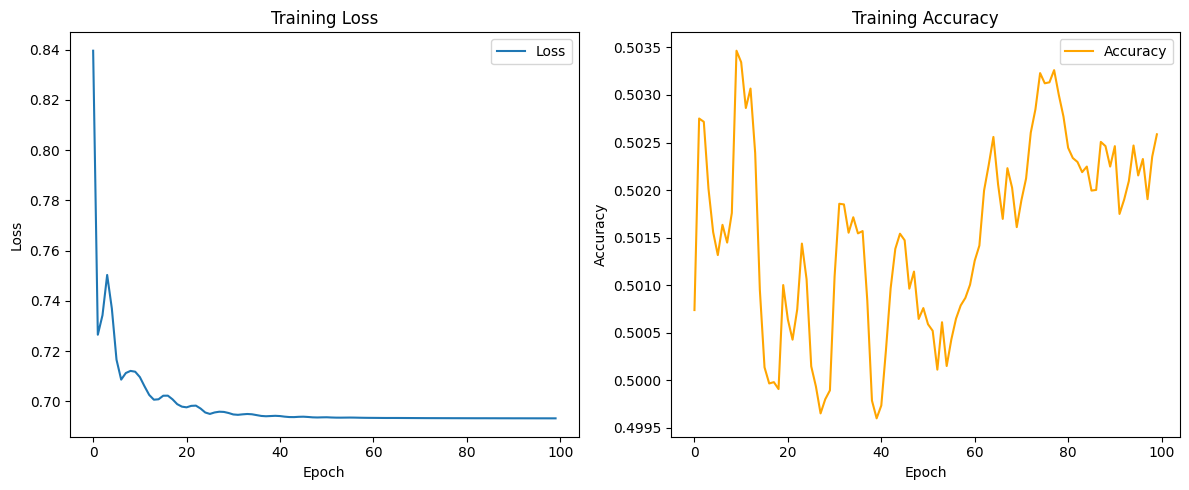

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt

# إعداد العقد (nodes) والروابط (edges) والميزات
edges_list = edges[["source", "target"]].values.T  # تأكد من أن edges معرفة بشكل صحيح
edges_index = torch.tensor(edges_list, dtype=torch.long)

# تعيين ميزات العقد
node_features = torch.tensor(features[["Node", "feature"]].values, dtype=torch.float)

# تعيين الأهداف (التصنيفات الثنائية)
data = Data(x=node_features, edge_index=edges_index)
data.y = torch.randint(0, 2, (data.edge_index.shape[1],), dtype=torch.float)

# التحقق من البيانات
assert data.y.shape[0] == data.edge_index.shape[1], "Mismatch between number of edges and labels"

# تعريف نموذج GNN
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(node_features.size(1), 64)
        self.conv2 = GCNConv(64, 32)
        self.fc = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # إخراج نهائي لتصنيف الرابط
        )
        self.batch_norm1 = nn.BatchNorm1d(64)
        self.batch_norm2 = nn.BatchNorm1d(32)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.batch_norm1(torch.relu(self.conv1(x, edge_index)))
        x = self.batch_norm2(torch.relu(self.conv2(x, edge_index)))

        edge_embeddings = torch.cat([x[edge_index[0]], x[edge_index[1]]], dim=1)
        out = self.fc(edge_embeddings)
        return out.view(-1)

# إنشاء نموذج وتهيئة المحسن
model = GNNModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# تدريب النموذج
import matplotlib.pyplot as plt

# تدريب النموذج وحساب الخسارة والدقة
def train(data, model, optimizer, epochs=100):
    model.train()
    losses = []
    accuracies = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        out = model(data).squeeze()  # إزالة الأبعاد الزائدة
        loss = torch.nn.functional.binary_cross_entropy_with_logits(out, data.y)
        loss.backward()
        optimizer.step()

        # حساب التوقعات والدقة
        preds = torch.sigmoid(out) > 0.5  # توقعات باستخدام العتبة 0.5
        accuracy = (preds == data.y).sum().item() / data.y.size(0)

        # تسجيل الخسارة والدقة
        losses.append(loss.item())
        accuracies.append(accuracy)

        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

    return losses, accuracies

# استدعاء التدريب
losses, accuracies = train(data, model, optimizer)

# رسم الخطوط البيانية
plt.figure(figsize=(12, 5))

# رسم الخسارة
plt.subplot(1, 2, 1)
plt.plot(losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# رسم الدقة
plt.subplot(1, 2, 2)
plt.plot(accuracies, label="Accuracy", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
unique, counts = torch.unique(data.y, return_counts=True)
print(dict(zip(unique.tolist(), counts.tolist())))


{0.0: 144303, 1.0: 144700}


In [25]:
print(node_features.mean(dim=0))
print(node_features.std(dim=0))


tensor([18840.8125,  1996.1492])
tensor([10886.4609,  1168.4636])


In [41]:
print(edges.columns)
print(target.columns)


Index(['source', 'target'], dtype='object')
Index(['id', 'label'], dtype='object')


Epoch 1/100, Loss: 0.9577, Accuracy: 0.1936, AUC: 0.3944, F1: 0.2477
Epoch 11/100, Loss: 0.5386, Accuracy: 0.8354, AUC: 0.6409, F1: 0.0817
Epoch 21/100, Loss: 0.4090, Accuracy: 0.8452, AUC: 0.6591, F1: 0.0698
Epoch 31/100, Loss: 0.4032, Accuracy: 0.8455, AUC: 0.6645, F1: 0.0669
Epoch 41/100, Loss: 0.4004, Accuracy: 0.8478, AUC: 0.6682, F1: 0.0507
Epoch 51/100, Loss: 0.3965, Accuracy: 0.8479, AUC: 0.6749, F1: 0.0494
Epoch 61/100, Loss: 0.3940, Accuracy: 0.8486, AUC: 0.6788, F1: 0.0432
Epoch 71/100, Loss: 0.3919, Accuracy: 0.8489, AUC: 0.6825, F1: 0.0407
Epoch 81/100, Loss: 0.3906, Accuracy: 0.8492, AUC: 0.6839, F1: 0.0346
Epoch 91/100, Loss: 0.3896, Accuracy: 0.8496, AUC: 0.6846, F1: 0.0311


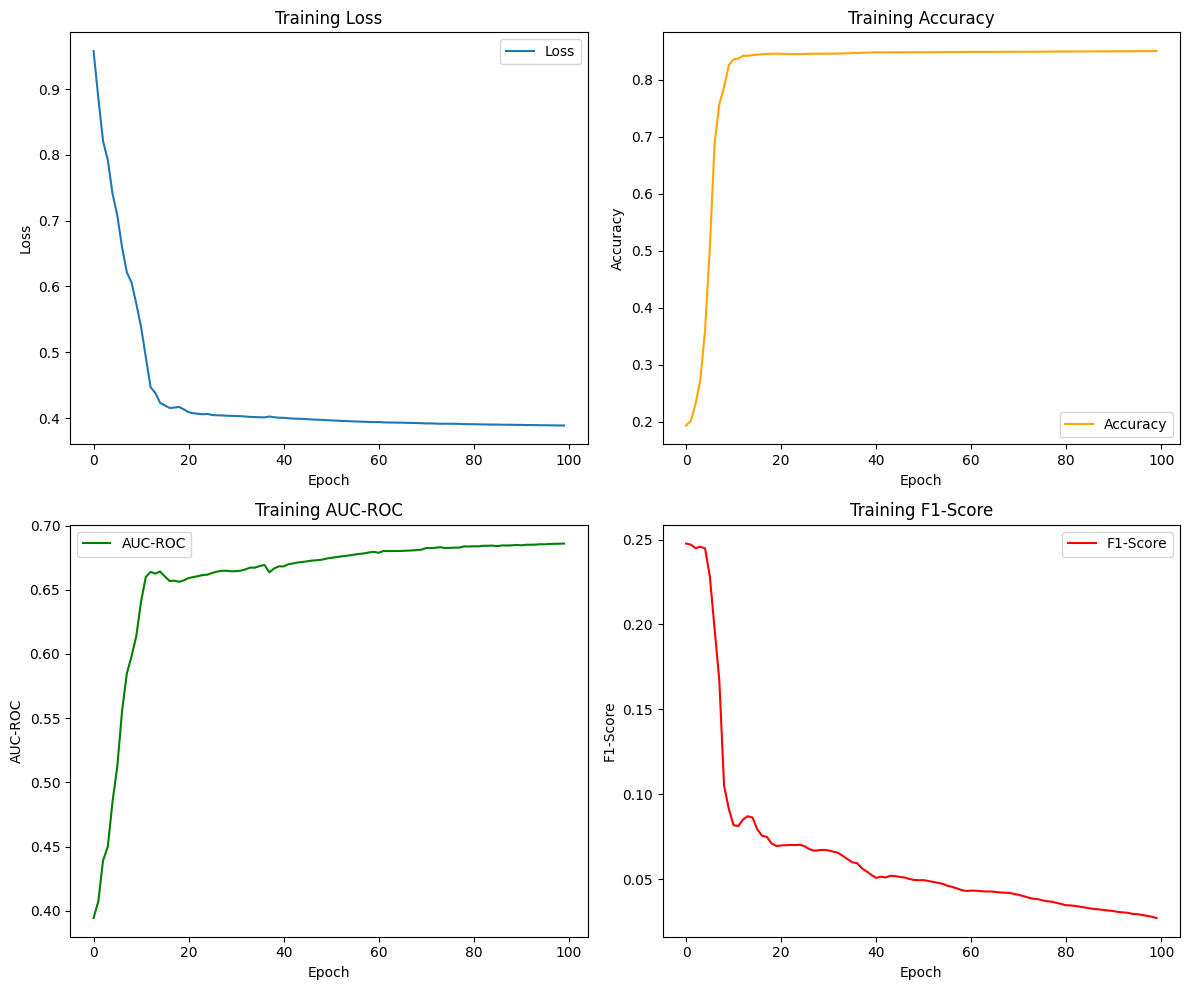

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, f1_score

# إعداد العقد (nodes) والروابط (edges) والميزات
# افترض أن edges وfeatures قد تم تحميلهما بالفعل
edges_list = edges[["source", "target"]].values.T
edges_index = torch.tensor(edges_list, dtype=torch.long)

# إعداد ميزات العقد
features_sorted = features.sort_values("Node").reset_index(drop=True)
node_features = torch.tensor(features_sorted.iloc[:, 1:].values, dtype=torch.float)

# إعداد الأهداف
edges_with_labels = edges.merge(target, left_on="target", right_on="id", how="left")
labels = edges_with_labels["label"].fillna(0).values
data_y = torch.tensor(labels, dtype=torch.float)

# إنشاء كائن Data
from torch_geometric.data import Data

data = Data(x=node_features, edge_index=edges_index, y=data_y)

# التحقق من البيانات
assert data.y.shape[0] == data.edge_index.shape[1], "Mismatch between number of edges and labels"
# تعريف نموذج GNN
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(node_features.size(1), 64)
        self.conv2 = GCNConv(64, 32)
        self.fc = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        self.batch_norm1 = nn.BatchNorm1d(64)
        self.batch_norm2 = nn.BatchNorm1d(32)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.batch_norm1(torch.relu(self.conv1(x, edge_index)))
        x = self.batch_norm2(torch.relu(self.conv2(x, edge_index)))
        edge_embeddings = torch.cat([x[edge_index[0]], x[edge_index[1]]], dim=1)
        out = self.fc(edge_embeddings)
        return out.view(-1)

# إنشاء نموذج ومحسن
model = GNNModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# دالة التدريب مع حساب المقاييس
def train_with_metrics(data, model, optimizer, epochs=100):
    model.train()
    losses, accuracies, aucs, f1_scores = [], [], [], []

    for epoch in range(epochs):
        optimizer.zero_grad()
        out = model(data).squeeze()
        loss = torch.nn.functional.binary_cross_entropy_with_logits(out, data.y)
        loss.backward()
        optimizer.step()

        # التوقعات والمقاييس
        preds = torch.sigmoid(out) > 0.5
        accuracy = (preds == data.y).sum().item() / data.y.size(0)
        preds_np = torch.sigmoid(out).detach().numpy()
        labels_np = data.y.detach().numpy()
        auc = roc_auc_score(labels_np, preds_np)
        f1 = f1_score(labels_np, preds_np > 0.5)

        # تسجيل القيم
        losses.append(loss.item())
        accuracies.append(accuracy)
        aucs.append(auc)
        f1_scores.append(f1)

        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}')

    return losses, accuracies, aucs, f1_scores

# تدريب النموذج
losses, accuracies, aucs, f1_scores = train_with_metrics(data, model, optimizer)

# رسم النتائج
plt.figure(figsize=(12, 10))

# رسم الخسارة
plt.subplot(2, 2, 1)
plt.plot(losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# رسم الدقة
plt.subplot(2, 2, 2)
plt.plot(accuracies, label="Accuracy", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()

# رسم AUC-ROC
plt.subplot(2, 2, 3)
plt.plot(aucs, label="AUC-ROC", color="green")
plt.xlabel("Epoch")
plt.ylabel("AUC-ROC")
plt.title("Training AUC-ROC")
plt.legend()

# رسم F1-Score
plt.subplot(2, 2, 4)
plt.plot(f1_scores, label="F1-Score", color="red")
plt.xlabel("Epoch")
plt.ylabel("F1-Score")
plt.title("Training F1-Score")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100, Loss: 0.6090, Accuracy: 0.7836, AUC: 0.5826, F1: 0.1229
Epoch 11/100, Loss: 0.4797, Accuracy: 0.8318, AUC: 0.6537, F1: 0.0667
Epoch 21/100, Loss: 0.4512, Accuracy: 0.8386, AUC: 0.6599, F1: 0.0535
Epoch 31/100, Loss: 0.4263, Accuracy: 0.8449, AUC: 0.6693, F1: 0.0333
Epoch 41/100, Loss: 0.4212, Accuracy: 0.8452, AUC: 0.6702, F1: 0.0319
Epoch 51/100, Loss: 0.4173, Accuracy: 0.8462, AUC: 0.6729, F1: 0.0294
Epoch 61/100, Loss: 0.4133, Accuracy: 0.8471, AUC: 0.6749, F1: 0.0266
Epoch 71/100, Loss: 0.4115, Accuracy: 0.8474, AUC: 0.6754, F1: 0.0250
Epoch 81/100, Loss: 0.4098, Accuracy: 0.8478, AUC: 0.6762, F1: 0.0239
Epoch 91/100, Loss: 0.4081, Accuracy: 0.8483, AUC: 0.6772, F1: 0.0219


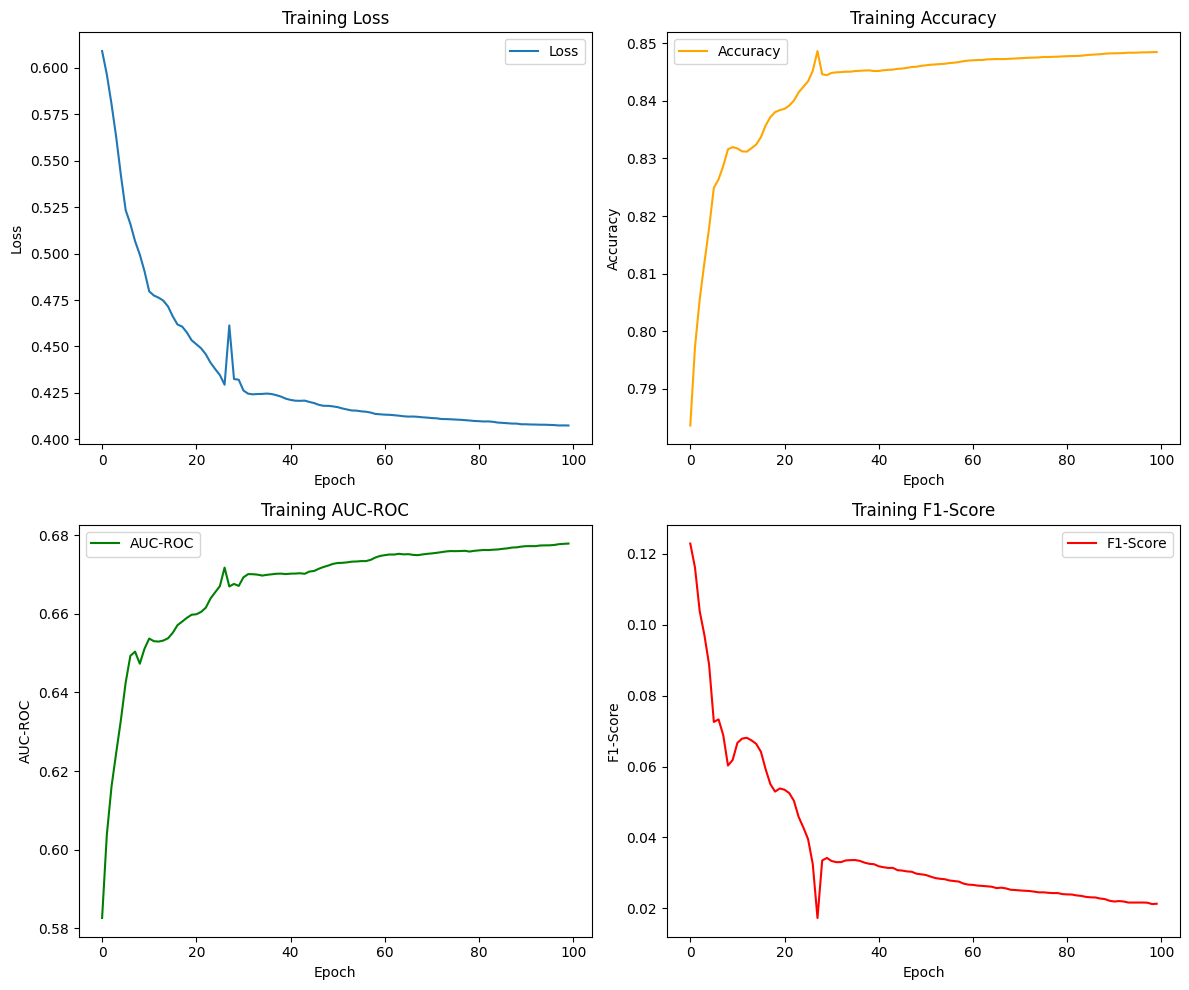

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, f1_score


# إعداد العقد (nodes) والروابط (edges) والميزات
# افترض أن edges وfeatures قد تم تحميلهما بالفعل
edges_list = edges[["source", "target"]].values.T
edges_index = torch.tensor(edges_list, dtype=torch.long)

# إعداد ميزات العقد مع التوحيد القياسي
features_sorted = features.sort_values("Node").reset_index(drop=True)
scaler = MinMaxScaler()
node_features_scaled = scaler.fit_transform(features_sorted.iloc[:, 1:])  # توحيد الميزات
node_features = torch.tensor(node_features_scaled, dtype=torch.float)

# إعداد الأهداف
edges_with_labels = edges.merge(target, left_on="target", right_on="id", how="left")
labels = edges_with_labels["label"].fillna(0).values
data_y = torch.tensor(labels, dtype=torch.float)

# إنشاء كائن Data
data = Data(x=node_features, edge_index=edges_index, y=data_y)

# التحقق من البيانات
assert data.y.shape[0] == data.edge_index.shape[1], "Mismatch between number of edges and labels"


class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(node_features.size(1), 128)  # زيادة حجم الطبقة الأولى
        self.conv2 = GCNConv(128, 64)  # زيادة حجم الطبقة الثانية
        self.conv3 = GCNConv(64, 32)  # إضافة طبقة ثالثة
        self.fc = nn.Sequential(
            nn.Linear(64, 32),
            nn.LeakyReLU(negative_slope=0.01),  # استخدام LeakyReLU بدلاً من ReLU
            nn.Linear(32, 1)
        )
        self.batch_norm1 = nn.BatchNorm1d(128)  # زيادة حجم طبقة BatchNorm
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.batch_norm3 = nn.BatchNorm1d(32)  # إضافة طبقة BatchNorm جديدة

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.batch_norm1(torch.relu(self.conv1(x, edge_index)))
        x = self.batch_norm2(torch.relu(self.conv2(x, edge_index)))
        x = self.batch_norm3(torch.relu(self.conv3(x, edge_index)))  # طبقة GCN إضافية

        # استخراج تمثيلات الحواف (edges) بناءً على العقد المرتبطة بكل رابط
        edge_embeddings = torch.cat([x[edge_index[0]], x[edge_index[1]]], dim=1)

        # تمرير التمثيلات عبر الطبقة النهائية
        out = self.fc(edge_embeddings)

        # التأكد من أن الخرج يتوافق مع عدد الروابط
        return out.view(-1)  # تأكد من أن الخرج يكون بحجم (عدد الروابط)
model = GNNModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # استخدام معدل تعلم منخفض
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.5)  # مجدول معدل التعلم
class_weights = torch.tensor([1.0, 10.0], dtype=torch.float)  # وزن أكبر للفئة الأقل تواجدًا
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=class_weights)

# دالة التدريب مع حساب المقاييس
def train_with_metrics(data, model, optimizer, scheduler, epochs=100):
    model.train()
    losses, accuracies, aucs, f1_scores = [], [], [], []

    for epoch in range(epochs):
        optimizer.zero_grad()
        out = model(data)  # استخدام نموذج GNN
        out = out.view(-1)  # إعادة تشكيل الخرج ليتناسب مع الحجم المتوقع

        # التحقق من أن حجم الخرج يتطابق مع حجم الأهداف
        assert out.shape[0] == data.y.shape[0], f"Mismatch in output shape: {out.shape[0]} vs {data.y.shape[0]}"

        # حساب الخسارة
        loss = torch.nn.functional.binary_cross_entropy_with_logits(out, data.y)  # استخدام الخسارة مع الأهداف المتوافقة
        loss.backward()
        optimizer.step()

        # تحديث معدل التعلم بعد كل حقبة
        scheduler.step()

        # التوقعات والمقاييس
        preds = torch.sigmoid(out) > 0.5
        accuracy = (preds == data.y).sum().item() / data.y.size(0)
        preds_np = torch.sigmoid(out).detach().numpy()
        labels_np = data.y.detach().numpy()
        auc = roc_auc_score(labels_np, preds_np)
        f1 = f1_score(labels_np, preds_np > 0.5)

        # تسجيل القيم
        losses.append(loss.item())
        accuracies.append(accuracy)
        aucs.append(auc)
        f1_scores.append(f1)

        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}')

    return losses, accuracies, aucs, f1_scores

# تدريب النموذج
losses, accuracies, aucs, f1_scores = train_with_metrics(data, model, optimizer, scheduler)

# رسم النتائج
plt.figure(figsize=(12, 10))

# رسم الخسارة
plt.subplot(2, 2, 1)
plt.plot(losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# رسم الدقة
plt.subplot(2, 2, 2)
plt.plot(accuracies, label="Accuracy", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()

# رسم AUC-ROC
plt.subplot(2, 2, 3)
plt.plot(aucs, label="AUC-ROC", color="green")
plt.xlabel("Epoch")
plt.ylabel("AUC-ROC")
plt.title("Training AUC-ROC")
plt.legend()

# رسم F1-Score
plt.subplot(2, 2, 4)
plt.plot(f1_scores, label="F1-Score", color="red")
plt.xlabel("Epoch")
plt.ylabel("F1-Score")
plt.title("Training F1-Score")
plt.legend()

plt.tight_layout()
plt.show()


In [49]:
print(f"عدد الروابط: {data.edge_index.shape[1]}")
print(f"عدد الأهداف: {data.y.shape[0]}")



عدد الروابط: 289003
عدد الأهداف: 289003


In [64]:
!pip install --upgrade xgboost scikit-learn


In [69]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# افترض أن `features` هي بيانات المدخلات و `target` هي البيانات المستهدفة
# دمج الميزات مع الأهداف لتشكيل مجموعة بيانات التدريب
data = pd.merge(features, target, left_on="Node", right_on="id", how="left")

# تحديد الميزات (X) والأهداف (y)
X = data.iloc[:, 1:-1].values  # استبعاد العمود الأول "Node" وآخر عمود "label"
y = data["label"].fillna(0).values  # استبدال القيم المفقودة بالـ 0

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تحويل البيانات إلى تنسيق DMatrix الخاص بـ XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# تحديد معلمات XGBoost
params = {
    'objective': 'binary:logistic',  # التصنيف الثنائي
    'eval_metric': 'logloss',  # استخدام logloss كمقياس
    'max_depth': 6,  # الحد الأقصى لعمق الشجرة
    'eta': 0.1,  # معدل التعلم
    'subsample': 0.8,  # نسبة العينات المستخدمة لبناء كل شجرة
    'colsample_bytree': 0.8,  # نسبة الميزات المستخدمة لبناء كل شجرة
    'scale_pos_weight': 1  # موازنة الأوزان بين الفئات
}

# تدريب النموذج
num_round = 100  # عدد التكرارات (الدورات)
bst = xgb.train(params, dtrain, num_round)

# إجراء التنبؤات
y_pred_prob = bst.predict(dtest)  # الحصول على الاحتمالات
y_pred = (y_pred_prob > 0.5).astype(int)  # تحويل الاحتمالات إلى تصنيف (0 أو 1)

# حساب المقاييس
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)

# طباعة النتائج
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7433
AUC: 0.6199
F1 Score: 0.1054
